In [1]:
%matplotlib inline
from Effect_of_time_constant_damping_and_natural_frequency import*


:0: FutureWarning: IPython widgets are experimental and may change in the future.


#Effect of the time constant, natural frequency and damping ratio demo
<br>and what the effect of the natural frequency and damping ratio is on standard second order systems
<br>

<br>
<br>There are three possible plots: Zeros/poles plot, Bode plot and step response.

## First order system
In this demo you can see what the influence is of the time constant on standard first order systems<br> 
$H(s)= \large{\frac{k}{\tau s+1}}$ (with $\tau$ the symbol for time constant) $\Rightarrow$ 
$h(t) = \frac{k}{\tau} e^{-\frac{t}{\tau}}$<br>
The system has a pole in $\frac{1}{\tau}$.<br>
For a positive $\tau$, the step response converges to a certain value. For a negative $\tau$, the step response evolves towards $-\infty$.<br>
If $\tau$ goes to 0+, the pole of the system moves to infinity and the step response goes faster to the staedy state.

H(s) =

    89
---------
9.2 s + 1



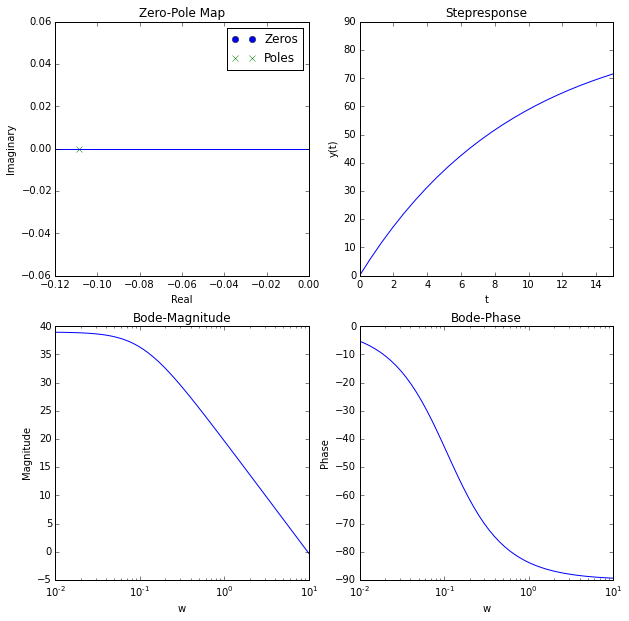

In [2]:
def first_order(k,tau):
    TF=TransferFunction([k,],[tau,1])
    print "H(s) =" 
    print TF
    [mag,phase,wout] = bode(TF,Plot=False,dB=True)
    ax = subplot(221)
    pole_zero(TF)
    ax.legend()
    subplot(222)
    t,y=step_response(TF)
    title("Stepresponse")
    xlabel('t')
    xlim([0,15])
    ylabel('y(t)')
    plot(t,y)
    subplot(223)
    bode_magnitude(wout,mag)
    subplot(224)
    bode_phase(wout,phase)
    fig = gcf()
    fig.set_size_inches(10,10)
    show ()
    
interact(first_order,k=(1,100,1),tau=(0.1,10,0.1))

## Second order
$H(s)=\large{\frac{\omega_n ^2}{s^2 +2\zeta\omega_n+\omega_n ^2}}$ (with $\omega_n$ the natural frequency and
 $\zeta$ the damping ratio).<br>
A second order system always has 2 poles. 
- If $\zeta < 1$ the poles are 2 complex conjugates.We call the system <b> underdamped</b> . The step response is oscillating and we can see a resonance effect on the Bode plot (= peak before it decays).
- If $\zeta = 1$, the poles are real and coincide. We call the system <b>critically damped</b>. There are no oscillations.
- If $\zeta > 1$, the 2 poles are real and don't coincide. The system is <b> overdamped</b>, there are no oscillations

H(s) =

       1e+04
-------------------
s^2 + 600 s + 1e+04



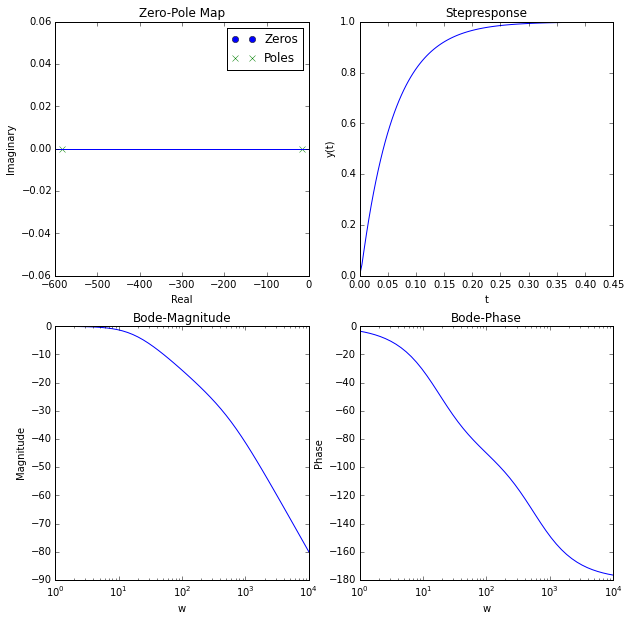

In [3]:
def second_order(zeta,natfreq):
    TF=TransferFunction([natfreq**2,],[1,2*zeta*natfreq,natfreq**2])
    print "H(s) ="  
    print TF
    [mag,phase,wout] = bode(TF,Plot=False,dB=True)
    ax = subplot(221)
    pole_zero(TF)
    ax.legend()
    subplot(222)
    t,y=step_response(TF)
    title("Stepresponse")
    xlabel('t')
    ylabel('y(t)')
    plot(t,y)
    subplot(223)
    bode_magnitude(wout,mag)
    subplot(224)
    bode_phase(wout,phase)
    fig = gcf()
    fig.set_size_inches(10,10)
    show ()
    
interact(second_order,zeta=(0,3,0.01),natfreq=(1,100,1))